# Alternating Direction Method of Multipliers (ADMM)

The equations for the ADMM update steps are as follows:

1. Update $\tilde{w}$:

$
\tilde{w}^{k+1} = \arg \min_{\tilde{w}} \left( f(\tilde{w}) + \frac{\rho}{2} \left\| \tilde{w} - w^k + \frac{y^k}{\rho} \right\|^2 \right)
$

2. Update w:

$
w^{k+1} = \arg \min_{w} \left( g(w) + \frac{\rho}{2} \left\| w - \tilde{w}^{k+1} - \frac{y^k}{\rho} \right\|^2 \right)
$

3. Update the dual variable y:

$
y^{k+1} = y^k + \rho \left( \tilde{w}^{k+1} - w^{k+1} \right)
$

To calculate the residual at each iteration, we use:

$
\text{Residual} = \left\| w^{k+1} - \tilde{w}^{k+1} \right\|_2
$

The objective function for each subproblem can be written as follows:

$\tilde{w}$ update:

$
\tilde{w}^{k+1} = \arg \min_{\tilde{w}} \left( f(\tilde{w}) + \frac{\rho}{2} \left\| \tilde{w} - w^k + \frac{y^k}{\rho} \right\|^2 \right)
$

Objective function for w update:

$
w^{k+1} = \arg \min_{w} \left( g(w) + \frac{\rho}{2} \left\| w - \tilde{w}^{k+1} - \frac{y^k}{\rho} \right\|^2 \right)
$

Now let's implement this!


In [18]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Problem dimensions and parameters
m, n = 100, 500
rho = 1.0  # Penalty parameter

# Generate random data
np.random.seed(0)
x_true = np.random.randn(n)
A = np.random.randn(n, n)
b = A @ x_true


#### Initialise variables

In [19]:
# Initialize variables
w = cp.Variable(n)
w_tilde = cp.Variable(n)
y = np.zeros(n)  # Dual variable

# Set initial values for `w` and `w_tilde`
w.value = np.zeros(n)
w_tilde.value = np.zeros(n)


#### Define f and g as convex functions

In [20]:
f = lambda w_tilde: cp.sum_squares(A @ w_tilde - b) / 2
g = lambda w: cp.sum_squares(w) / 2

#### Perform alternation optimization

In [21]:
from tqdm import tqdm

# Iteration parameters
max_iters = 1000
residuals = []

# ADMM iterations
for k in tqdm(range(max_iters)):
    # Update w_tilde by solving the subproblem
    w_tilde_obj = f(w_tilde) + (rho / 2) * cp.sum_squares(w_tilde - w.value + y / rho)
    w_tilde_problem = cp.Problem(cp.Minimize(w_tilde_obj))
    w_tilde_problem.solve(solver=cp.SCS)  # Use SCS solver
    
    # Update w by solving the subproblem
    w_obj = g(w) + (rho / 2) * cp.sum_squares(w - w_tilde.value - y / rho)
    w_problem = cp.Problem(cp.Minimize(w_obj))
    w_problem.solve(solver=cp.SCS)  # Use SCS solver
    
    # Update dual variable y
    y += rho * (w_tilde.value - w.value)
    
    # Calculate residual
    residual = np.linalg.norm(w.value - w_tilde.value)
    residuals.append(residual)

    # Break if residual is close to zero
    if residual < 1e-4:
        break


  2%|▏         | 17/1000 [00:03<03:41,  4.43it/s]



#### Plot the residuals

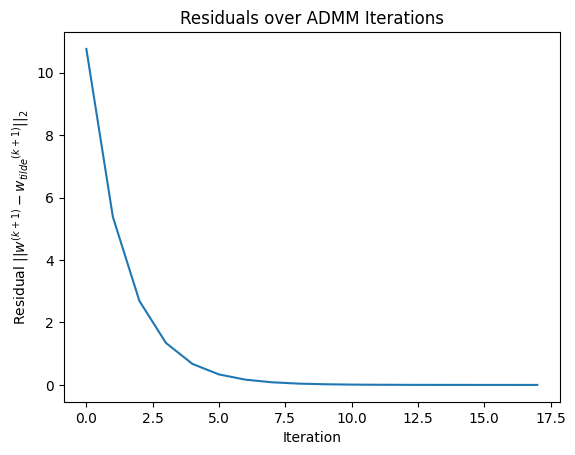

In [28]:
plt.plot(residuals)
plt.xlabel("Iteration")
plt.ylabel("Residual $||w^{(k+1)} - {w_{tilde}}^{(k+1)}||_2$")
plt.title("Residuals over ADMM Iterations")
plt.show()
